In [1]:
import os
import PIL
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image

In [2]:
train_folder = "./data/waferimages/training"
test_folder = "./data/waferimages/testing"
temp_folder = "./data/waferimages/temp"

batch_size = 100
img_height = 26
img_width = 26

num_classes = 8

In [4]:
import pathlib

input_path = pathlib.Path(train_folder)
input_count = len(list(input_path.glob('*/*.png')))

class_labels = np.array(sorted([item.name for item in input_path.glob('*')]))

center_path = list(input_path.glob(class_labels[0]+'/*')) 
center_count = len(list(center_path))
donut_path = list(input_path.glob(class_labels[1]+'/*'))
donut_count = len(list(donut_path))
edgeLoc_path = list(input_path.glob(class_labels[2]+'/*'))
edgeLoc_count = len(list(edgeLoc_path))
edgeRing_path = list(input_path.glob(class_labels[3]+'/*'))
edgeRing_count = len(list(edgeRing_path))
loc_path = list(input_path.glob(class_labels[4]+'/*'))
loc_count = len(list(loc_path))
nearFull_path = list(input_path.glob(class_labels[5]+'/*'))
nearFull_count = len(list(nearFull_path))
random_path = list(input_path.glob(class_labels[6]+'/*'))
random_count = len(list(random_path))
scratch_path = list(input_path.glob(class_labels[7]+'/*'))
scratch_count = len(list(scratch_path))
#none_path = list(input_path.glob(class_labels[8]+'/*'))
#none_count = len(list(none_path))

#print(input_path)
#print(input_count)
#print(center_path[0])
#print(center_count)
#print(donut_path[0])
#print(donut_count)
#print(edgeLoc_path[0])
#print(edgeLoc_count)
#print(edgeRing_path[0])
#print(edgeRing_count)
#print(loc_path[0])
#print(loc_count)
#print(nearFull_path[0])
#print(nearFull_count)
#print(none_path[0])
#print(none_count)
#print(random_path[0])
#print(random_count)
#print(scratch_path[0])
#print(scratch_count)

In [5]:
temp_path = pathlib.Path(temp_folder)
temp_count = len(list(temp_path.glob('*/*.png')))

print(temp_path)
print(temp_count)

data\waferimages\temp
0


In [6]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_folder,
  validation_split=0.2,
  subset="training",
  seed=1024,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 80000 files belonging to 8 classes.
Using 64000 files for training.


In [7]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_folder,
  validation_split=0.2,
  subset="validation",
  seed=1024,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 80000 files belonging to 8 classes.
Using 16000 files for validation.


In [8]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_folder,
  seed=1024,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 7894 files belonging to 8 classes.


In [10]:
#temp_ds = tf.keras.preprocessing.image_dataset_from_directory(
#  temp_folder,
#  seed=1024,
#  image_size=(img_height, img_width),
#  batch_size=batch_size)
#print(tf.data.experimental.cardinality(temp_ds).numpy())

In [11]:
class_names = train_ds.class_names
class_names

['Center',
 'Donut',
 'Edge-Loc',
 'Edge-Ring',
 'Loc',
 'Near-full',
 'Random',
 'Scratch']

In [12]:
val_class = val_ds.class_names
val_class

['Center',
 'Donut',
 'Edge-Loc',
 'Edge-Ring',
 'Loc',
 'Near-full',
 'Random',
 'Scratch']

In [13]:
test_class = test_ds.class_names
test_class

['Center',
 'Donut',
 'Edge-Loc',
 'Edge-Ring',
 'Loc',
 'Near-full',
 'Random',
 'Scratch']

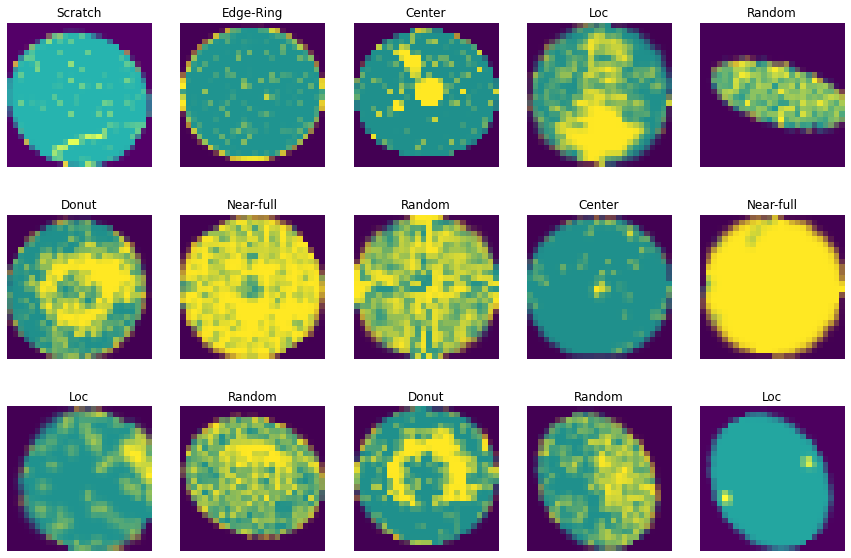

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
for images, labels in train_ds.take(1):
    for i in range(15):
        ax = plt.subplot(3, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [15]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [16]:
model0 = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  tf.keras.layers.Conv2D(16, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [17]:
model0.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [18]:
model0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 26, 26, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 24, 24, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          1

In [19]:
import time

epoch = 20

start = time.time()
history = model0.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epoch
)
end = time.time()
print('Learning Time : %.3f(sec)'%(end-start), ' => %.0f:%.0f'%( (end-start)/60, (end-start)%60 ))

Epoch 1/20


C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


640/640 [==============================] - 32s 27ms/step - loss: 0.6151 - accuracy: 0.7717 - val_loss: 0.3623 - val_accuracy: 0.8723
Epoch 2/20
640/640 [==============================] - 13s 21ms/step - loss: 0.3064 - accuracy: 0.8875 - val_loss: 0.2641 - val_accuracy: 0.9016
Epoch 3/20
640/640 [==============================] - 14s 21ms/step - loss: 0.2247 - accuracy: 0.9194 - val_loss: 0.2365 - val_accuracy: 0.9116
Epoch 4/20
640/640 [==============================] - 14s 22ms/step - loss: 0.1776 - accuracy: 0.9372 - val_loss: 0.2184 - val_accuracy: 0.9172
Epoch 5/20
640/640 [==============================] - 14s 21ms/step - loss: 0.1503 - accuracy: 0.9476 - val_loss: 0.1391 - val_accuracy: 0.9511
Epoch 6/20
640/640 [==============================] - 14s 22ms/step - loss: 0.1324 - accuracy: 0.9534 - val_loss: 0.1194 - val_accuracy: 0.9583
Epoch 7/20
640/640 [==============================] - 14s 22ms/step - loss: 0.1171 - accuracy: 0.9588 - val_loss: 0.1333 - val_accuracy: 0.9510
Epo

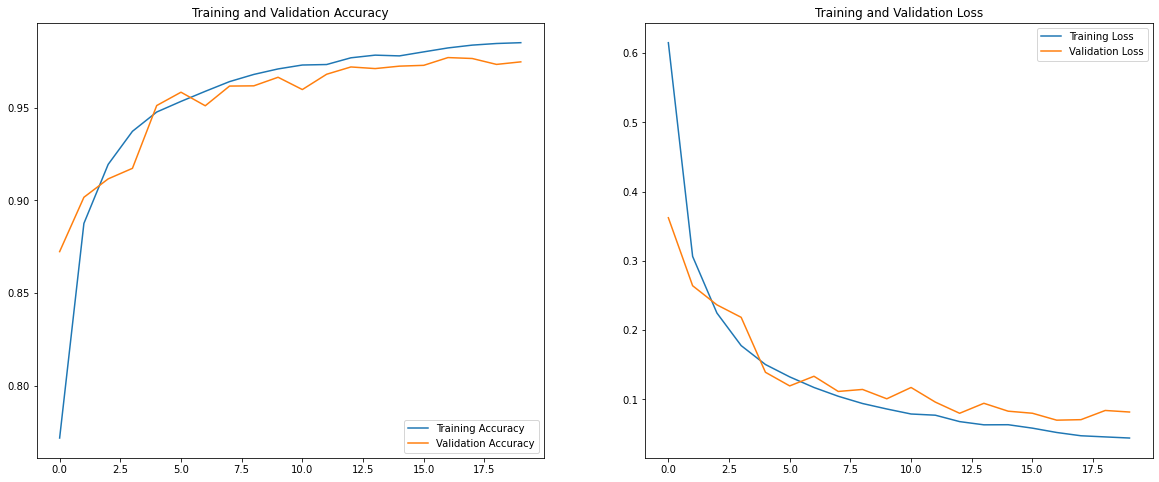

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epoch)

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [24]:
x_temp, y_temp = [], []

#for image_batch, labels_batch in temp_ds.take(tf.data.experimental.cardinality(temp_ds).numpy()):  # All
for image_batch, labels_batch in temp_ds.take(2):   # batch
    for x in range(len(image_batch)):
        x_temp.append(image_batch[x])
        y_temp.append(labels_batch[x])
    #print(type(labels_batch))
    print(labels_batch.dtype)

print(len(x_temp))
print()

<dtype: 'int32'>
<dtype: 'int32'>
105



In [21]:
x_train, y_train = [], []
batch_count = 10
image_count = 0

for image_batch, labels_batch in train_ds.take(batch_count):
    image_count += len(image_batch) 
    for x in range(len(image_batch)):
        x_train.append(image_batch[x])
        y_train.append(labels_batch[x])

print(len(x_train))
print()

xtrain_np = np.asarray(x_train)
ytrain_np = np.asarray(y_train)
xtrain_np = xtrain_np.reshape(image_count, 26, 26, 3)
xtrain_np = xtrain_np.astype(np.float32) / 255

predict_trn = model0.predict(xtrain_np)

res_trn = model0.evaluate(xtrain_np, ytrain_np, verbose=0)
print(res_trn)

1000

[13.352715492248535, 0.12700000405311584]


Text(0.5, 1.0, '4')

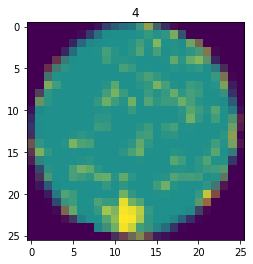

In [56]:
index = 1
plt.imshow(xtrain_np[index])
plt.title(ytrain_np[index])

In [57]:
xtrain_np1 = xtrain_np[index]
xtrain_np1 = xtrain_np1.reshape(1, 26, 26, 3)
xtrain_np1 = xtrain_np1.astype(np.float32) / 255

predict_trn = model0.predict(xtrain_np1)
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(predict_trn)], 100 * np.max(predict_trn))
)
print(len(predict_trn))
print(predict_trn)

This image most likely belongs to none with a 72.70 percent confidence.
1
[[6.7210058e-03 6.2674298e-03 3.4261703e-02 6.3505229e-03 1.9719955e-01
  9.1351118e-05 1.4385583e-02 7.7474662e-03 7.2697538e-01]]


In [22]:
x_val, y_val = [], []
batch_count = 10
image_count = 0

for image_batch, labels_batch in val_ds.take(batch_count):
    image_count += len(image_batch) 
    for x in range(batch_size):
        x_val.append(image_batch[x])
        y_val.append(labels_batch[x])

print(len(x_val))
print()

xval_np = np.asarray(x_val)
yval_np = np.asarray(y_val)
xval_np = xval_np.reshape(image_count, 26, 26, 3)
xval_np = xval_np.astype(np.float32) / 255

predict_val = model0.predict(xval_np)

res_val = model0.evaluate(xval_np, yval_np, verbose=0)
print(res_val)

1000

[13.388813018798828, 0.11999999731779099]


Text(0.5, 1.0, '4')

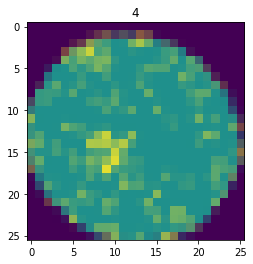

In [80]:
index = 10
plt.imshow(xval_np[index])
plt.title(yval_np[index])

In [81]:
xval_np1 = xval_np[index]
xval_np1 = xval_np1.reshape(1, 26, 26, 3)
xval_np1 = xval_np1.astype(np.float32) / 255

predict_val = model0.predict(xval_np1)
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(predict_val)], 100 * np.max(predict_val))
)
print(len(predict_val))
print(predict_val)

This image most likely belongs to none with a 72.70 percent confidence.
1
[[6.7209005e-03 6.2676994e-03 3.4263697e-02 6.3505438e-03 1.9721411e-01
  9.1357790e-05 1.4388730e-02 7.7473000e-03 7.2695565e-01]]


In [46]:
x_test, y_test = [], []
batch_count = 20
image_count = 0

for image_batch, labels_batch in test_ds.take(batch_count):
    image_count += len(image_batch)
    for x in range(batch_size):
        x_test.append(image_batch[x])
        y_test.append(labels_batch[x])            
        
print(len(x_test))
print()

xtest_np = np.asarray(x_test)
ytest_np = np.asarray(y_test)
xtest_np = xtest_np.reshape(image_count, 26, 26, 3)
xtest_np = xtest_np.astype(np.float32) / 255

predict_tst = model0.predict(xtest_np)

res_tst = model0.evaluate(xtest_np, ytest_np, verbose=0)
print(res_tst)

2000

[9.553762435913086, 0.25099998712539673]


Text(0.5, 1.0, '7')

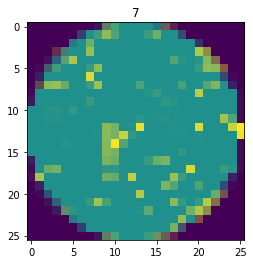

In [44]:
index = 3
plt.imshow(xtest_np[index])
plt.title(ytest_np[index])

In [45]:
xtest_np1 = xtest_np[index]
xtest_np1 = xtest_np1.reshape(1, 26, 26, 3)
xtest_np1 = xtest_np1.astype(np.float32) / 255

predict_tst = model0.predict(xtest_np1)
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(predict_tst)], 100 * np.max(predict_tst))
)
print(predict_tst)

This image most likely belongs to Loc with a 100.00 percent confidence.
[[8.8482429e-06 6.6132003e-08 1.9591727e-05 5.4955211e-07 9.9996889e-01
  9.3886507e-07 4.7531809e-12 1.1807967e-06]]


In [60]:
#for i in range(10):
#    print(predict_tst[i])
#    print()

In [47]:
conf = np.zeros((9,9), dtype=np.int16)
for i in range(len(predict_tst)):
    conf[np.argmax(predict_tst[i])][ytest_np[i]]+=1
print(conf)

[[  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]
 [195  42 699 280 502  28  69 185   0]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]]


data\waferimages\training\Center\101787.png


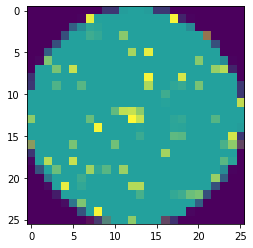

In [24]:
print(center_path[0])
img = keras.preprocessing.image.load_img(
    center_path[0], target_size=(img_height, img_width)
)
plt.imshow(img)

In [25]:
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model0.predict(img_array)

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(predictions)], 100 * np.max(predictions))
)

This image most likely belongs to Scratch with a 56.96 percent confidence.


data\waferimages\training\Edge-Loc\1025.png


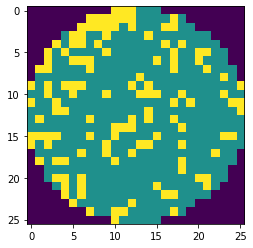

In [26]:
print(edgeLoc_path[0])
img = keras.preprocessing.image.load_img(
    edgeLoc_path[0], target_size=(img_height, img_width)
)
plt.imshow(img)

In [27]:
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model0.predict(img_array)

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(predictions)], 100 * np.max(predictions))
)

This image most likely belongs to Scratch with a 99.99 percent confidence.


data\waferimages\training\Edge-Ring\100.png


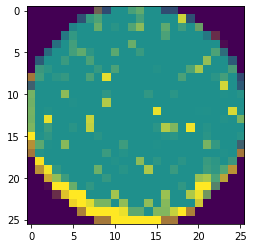

In [28]:
print(edgeRing_path[0])
img = keras.preprocessing.image.load_img(
    edgeRing_path[0], target_size=(img_height, img_width)
)
plt.imshow(img)

In [29]:
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model0.predict(img_array)

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(predictions)], 100 * np.max(predictions))
)

This image most likely belongs to Edge-Ring with a 98.21 percent confidence.


data\waferimages\training\Loc\100346.png


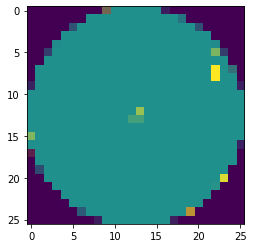

In [30]:
print(loc_path[0])
img = keras.preprocessing.image.load_img(
    loc_path[0], target_size=(img_height, img_width)
)
plt.imshow(img)

In [31]:
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model0.predict(img_array)

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(predictions)], 100 * np.max(predictions))
)

This image most likely belongs to Center with a 80.60 percent confidence.


data\waferimages\training\Near-full\2219.png


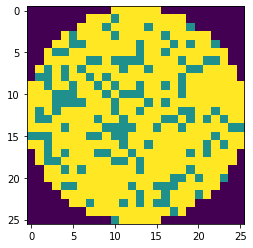

In [32]:
print(nearFull_path[0])
img = keras.preprocessing.image.load_img(
    nearFull_path[0], target_size=(img_height, img_width)
)
plt.imshow(img)

In [33]:
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model0.predict(img_array)

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(predictions)], 100 * np.max(predictions))
)

This image most likely belongs to Random with a 99.99 percent confidence.


In [35]:
#print(none_path[0])
#img = keras.preprocessing.image.load_img(
#    none_path[0], target_size=(img_height, img_width)
#)
#plt.imshow(img)

In [116]:
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model0.predict(img_array)

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(predictions)], 100 * np.max(predictions))
)

This image most likely belongs to none with a 99.49 percent confidence.


data\waferimages\training\Random\108432.png


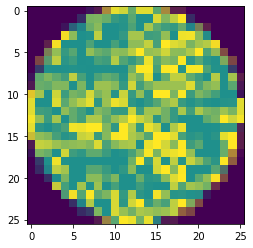

In [36]:
print(random_path[0])
img = keras.preprocessing.image.load_img(
    random_path[0], target_size=(img_height, img_width)
)
plt.imshow(img)

In [37]:
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model0.predict(img_array)

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(predictions)], 100 * np.max(predictions))
)

This image most likely belongs to Random with a 100.00 percent confidence.


data\waferimages\training\Scratch\101929.png


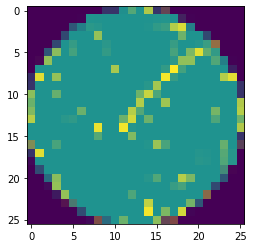

In [38]:
print(scratch_path[0])
img = keras.preprocessing.image.load_img(
    scratch_path[0], target_size=(img_height, img_width)
)
plt.imshow(img)

In [39]:
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model0.predict(img_array)

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(predictions)], 100 * np.max(predictions))
)

This image most likely belongs to Scratch with a 100.00 percent confidence.


In [53]:
def create_model( opt ):
    global train_ds, val_ds
    
    accuracy = 0
    
    AUTOTUNE = tf.data.experimental.AUTOTUNE

    train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
    val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

    num_classes = 9

    model1 = tf.keras.Sequential([
      layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
      tf.keras.layers.Conv2D(16, 3, activation='relu'),
      tf.keras.layers.MaxPooling2D(),
      tf.keras.layers.Conv2D(32, 3, activation='relu'),
      tf.keras.layers.MaxPooling2D(),
      tf.keras.layers.Conv2D(64, 3, activation='relu'),
      tf.keras.layers.MaxPooling2D(),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(num_classes, activation='softmax')
    ])

    model1.compile(
      optimizer=opt,
      loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
      metrics=['accuracy'])
    
    history = model1.fit(
      train_ds,
      validation_data=val_ds,
      epochs=epoch
    )

In [57]:
#acc_Adam = create_model(keras.optimizers.Adam())
#acc_SGD = create_model(keras.optimizers.SGD())
#acc_Adagrad = create_model(keras.optimizers.Adagrad())
#acc_RMSprop = create_model(keras.optimizers.RMSprop())

#print("Adam :", np.array(acc_Adam).mean())
#print("SGD :", np.array(acc_SGD).mean())
#print("Adagrad :", np.array(acc_Adagrad).mean())
#print("RMSprop :", np.array(acc_RMSprop).mean())